**Nama : Briska Putra Ananda**

**NIM : 5312422020**

**Prodi : Teknik Komputer**

#**Jobsheet 5 IIR**

In [ ]:
pip install scikit-dsp-comm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
%pylab inline
#%pylab notebook # untuk plot yang dapat diedit di notebook
#%matplotlib qt # untuk plot yang muncul di jendela terpisah

# Mengimpor modul sk_dsp_comm.sigsys dengan alias ss
import sk_dsp_comm.sigsys as ss
# Mengimpor modul sk_dsp_comm.fir_design_helper dengan alias fir_d
import sk_dsp_comm.fir_design_helper as fir_d
# Mengimpor modul sk_dsp_comm.iir_design_helper dengan alias iir_d
import sk_dsp_comm.iir_design_helper as iir_d
# Mengimpor modul sk_dsp_comm.multirate_helper dengan alias mrh
import sk_dsp_comm.multirate_helper as mrh
# Mengimpor modul scipy.signal dengan alias signal
import scipy.signal as signal
# Mengimpor fungsi Audio dan display dari IPython.display untuk memutar dan menampilkan audio
from IPython.display import Audio, display
# Mengimpor fungsi Image dan SVG dari IPython.display untuk menampilkan gambar dan SVG
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [ ]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

## **Design Examples**

## Desain IIR Berdasarkan Transformasi Bilinear
Ada beberapa cara untuk merancang filter IIR berdasarkan persyaratan respons amplitudo. Ketika keinginan adalah agar aproksimasi filter mengikuti prototipe analog seperti Butterworth, Chebychev, dll., menggunakan transformasi bilinear. Fungsi signal.iirdesign() yang dijelaskan di atas melakukan hal ini dengan tepat.

Dalam contoh di bawah ini, kita pertimbangkan persyaratan respons amplitudo lowpass dan melihat bagaimana urutan filter berubah saat kita memilih prototipe analog yang berbeda.

### Contoh: Perbandingan Desain Lowpass
Persyaratan respons amplitudo lowpass dengan $f_s = 48$ kHz adalah:
1. $f_\text{pass} = 5$ kHz
2. $f_\text{stop} = 8$ kHz
3. Ripple passband sebesar 0.5 dB
4. Attenuasi stopband sebesar 60 dB

Rancang empat filter untuk memenuhi persyaratan yang sama: butter, cheby1, cheby2, dan ellip:

In [ ]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

#### Perbandingan Respons Frekuensi
Di sini kita membandingkan respons magnitudo dalam dB menggunakan bentuk`sos` dari masing-masing filter sebagai input. Filter eliptikal adalah yang paling efisien, dan bahkan berhasil melebihi persyaratan stopband dengan mencapai kurang dari 8 kHz.

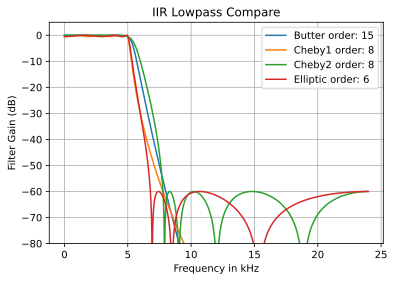

In [ ]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

Grafik tersebut membandingkan karakteristik filter lowpass IIR dari beberapa jenis filter: Butterworth, Chebyshev tipe 1 (Cheby1), Chebyshev tipe 2 (Cheby2), dan Elliptic. Setiap kurva menunjukkan respons frekuensi dalam dB terhadap rentang frekuensi dari 0 hingga 25 kHz.

- Kurva biru (Butterworth, orde 15): Menampilkan respons filter Butterworth orde 15, yang dikenal dengan respons frekuensi halus di dalam passband dan rolloff yang relatif lambat di stopband.

- Kurva oranye (Cheby1, orde 8): Menunjukkan filter Chebyshev tipe 1 orde 8, yang memiliki ripples dalam passband namun rolloff lebih cepat dibandingkan Butterworth.

- Kurva hijau (Cheby2, orde 8): Mewakili filter Chebyshev tipe 2 orde 8, yang memiliki ripples di stopband tetapi passband yang lebih halus dibandingkan tipe 1.

- Kurva merah (Elliptic, orde 6): Menampilkan filter Elliptic orde 6, yang menawarkan rolloff tercepat di antara jenis-jenis yang ditampilkan dan memiliki ripples tanto di passband maupun stopband.

Selanjutnya, plot konfigurasi pole-zero dari desain butterworth saja. Di sini kita menggunakan versi khusus dari ss.zplane yang berfungsi dengan array 2D sos.

(15, 15)

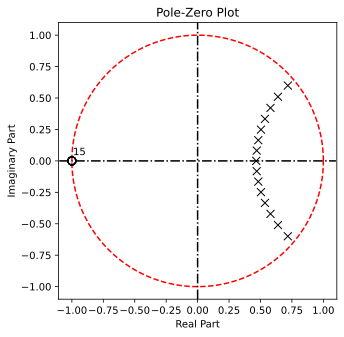

In [ ]:
iir_d.sos_zplane(sos_but)

Gambar diatas adalah plot kutub-nol (pole-zero plot) yang sering digunakan dalam analisis sistem kontrol atau sistem pemrosesan sinyal. Plot ini mendemonstrasikan posisi kutub (poles) dan nol (zeros) dari suatu fungsi transfer di bidang kompleks. Elemen-elemen pada plot ini adalah sebagai berikut:

- **Sumbu horizontal (Real Part):** Menunjukkan bagian real dari bilangan kompleks.
- **Sumbu vertikal (Imaginary Part):** Menunjukkan bagian imajiner dari bilangan kompleks.
- **Lingkaran:** Biasanya digunakan untuk menunjukkan batasan stabilitas sistem. Dalam konteks sistem stabilitas, kutub yang berada di dalam lingkaran menandakan sistem stabil, sedangkan kutub yang berada di luar lingkaran menandakan sistem yang tidak stabil.
- **Tanda 'X' (Cross):** Melambangkan kutub dari fungsi transfer.
- **Tanda 'O' (Circle):** Melambangkan nol dari fungsi transfer.

Dalam gambar ditampilkan, semua kutub ('X') terletak di sumbu real, yang menunjukkan bahwa mereka adalah real dan tidak memiliki komponen imajiner. Hanya ada satu titik nol (tidak ditunjukkan pada gambar), yang berarti tidak ada pengaruh khusus yang membatalkan efek kutub dalam respons frekuensi sistem.

Catatan bahwa dua plot di atas juga dapat diperoleh menggunakan bentuk fungsi transfer melalui `iir_d.freqz_resp_list([b],[a],'dB',fs=48)` dan `ss.zplane(b,a)` masing-masing. Bentuk `sos` akan memberikan hasil yang lebih akurat, karena kurang sensitif terhadap kuantisasi koefisien. Hal ini terutama benar untuk plot pole-zero, karena merooting polinomial derajat ke-15 jauh lebih rentan terhadap kesalahan dibandingkan merooting polinomial kuadrat sederhana.

Untuk Butterworth orde ke-15, transformasi bilinear memetakan 15 nol domain-s ke tak hingga menjadi $z=-1$. Jika Anda menggunakan `sk_dsp_comm.sigsys.zplane()`, Anda akan menemukan bahwa 15 nol berada dalam lingkaran rapat di sekitar $z=-1$, menunjukkan kesalahan merooting polinomial. Demikian pula, respons frekuensi akan lebih akurat.

Pemfilteran sinyal dari array `x` dilakukan menggunakan desain filter dengan fungsi dari `scipy.signal`:

1. Untuk bentuk fungsi transfer `y = signal.lfilter(b,a,x)`
2. Untuk bentuk sos `y = signal.sosfilt(sos,x)`sos,x)`

## Desain Filter Half-Band untuk Melewati hingga $W/2$ saat $f_s = 8$ kHz
Di sini kita mempertimbangkan desain lowpass yang perlu melewati frekuensi hingga $f_s/4$. Secara khusus ketika $f_s = 8000$ Hz, passband filter menjadi [0, 2000] Hz. Setelah koefisien ditemukan, sebuah objek`mrh.multirat` diciptakan untuk memungkinkan studi lebih lanjut tentang filter, dan akhirnya menerapkan filtering dari sinyal white noise.

Mulailah dengan desain eliptikal yang memiliki transition band yang terpusat pada 2000 Hz dengan ripple passband sebesar 0.5 dB dan attenuasi stopband sebesar 80 dB. Bandwidth transisi diatur menjadi 100 Hz, dengan 50 Hz di setiap sisi dari 2000 Hz.

In [ ]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)





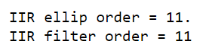


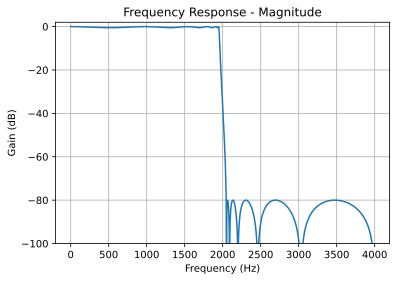

In [ ]:
mr_lp.freq_resp('db',8000)

Lewatkan white noise Gaussian dengan varians $\sigma_x^2 = 1$ melalui filter. Gunakan banyak sampel sehingga estimasi spektral dapat membentuk dengan akurat $S_y(f) = \sigma_x^2\cdot |H(e^{j2\pi f/f_s})|^2 = |H(e^{j2\pi f/f_s})|^2$.



Gambar diatas menampilkan grafik tanggapan frekuensi dalam bentuk magnitude untuk sebuah sistem atau komponen elektronik. Grafik ini diplot dengan Frekuensi di sumbu horizontal yang diukur dalam Hertz (Hz) dan Gain yang diukur dalam desibel (dB) pada sumbu vertikal.

Di gambar ini, kita dapat melihat beberapa karakteristik kunci:

1. **Pita Stop** (Stop Band): Terdapat dua area jelas di mana gain turun secara signifikan, yang pertama mulai sekitar frekuensi 2000 Hz hingga sedikit di atas 2500 Hz, dan yang kedua dimulai sekitar 3000 Hz hingga hampir 3500 Hz. Ini menunjukkan bahwa sistem atau filter tersebut memiliki pita penolakan di frekuensi tersebut, efektif mematikan atau sangat meredam sinyal pada rentang frekuensi tersebut.

2. **Pita Lewat** (Pass Band): Grafik menunjukkan area dengan gain yang sangat tinggi (mendekati 0 dB) dari awal hingga sekitar 2000 Hz yang menunjukkan bahwa pada frekuensi ini, sinyal akan dilewatkan dengan sedikit atau tanpa atenuasi.

3. **Peningkatan Denyut** (Peaking): Grafik menunjukkan tingkat yang meruncing atau "peak" pada sekitar 2750 Hz yang mana gain-nya naik kembali sebelum turun lagi, yang umumnya merupakan indikator karakteristik resonansi atau filter yang sengaja dirancang untuk memperkuat frekuensi tersebut.

(-130.0, -30.0)

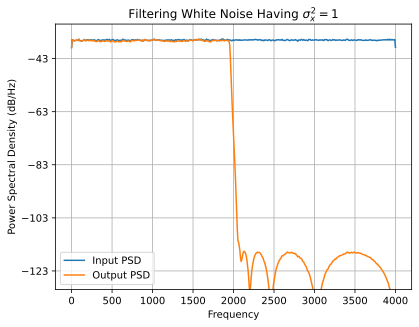

In [ ]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

In [ ]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


## Desain Bandpass Respons Amplitudo
Di sini kita pertimbangkan desain bandpass FIR dan IIR untuk digunakan dalam demodulator SSB untuk menghapus sinyal saluran sebelah yang mungkin berada di kedua sisi dari sebuah pita frekuensi yang berjalan dari 23 kHz hingga 24 kHz.

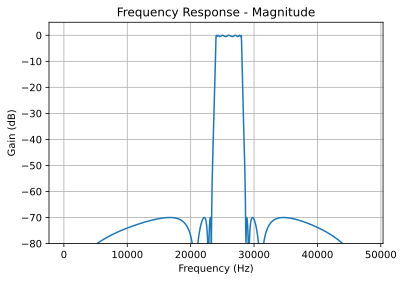

In [ ]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Gambar diatas adalah grafik respon frekuensi dalam domain magnitudo, yang menunjukkan bagaimana sistem atau filter merespons berbagai frekuensi input. Berikut adalah penjelasan rincinya:

1. **Sumbu Horizontal (X-Axis):** Menunjukkan frekuensi dalam Hertz (Hz), berkisar dari 0 hingga 50000 Hz.

2. **Sumbu Vertikal (Y-Axis):** Menunjukkan gain (penguatan) dalam desibel (dB), berkisar dari -80 dB hingga 10 dB.

3. **Bentuk Grafik:**

- **Daerah Passband:** Salah satu penanda utama dalam grafik ini adalah daerah di sekitar 30000 Hz, di mana gain mendekati 0 dB. Ini menunjukkan frekuensi yang diteruskan hampir tanpa atenuasi (pengurangan signal).
- **Daerah Stopband:** Terdapat daerah di sekitar frekuensi yang jauh dari 30000 Hz (di atas dan di bawahnya) di mana gain mendekati -80 dB, menunjukkan bahwa frekuensi-frekuensi tersebut sangat ditekan atau tidak diteruskan melalui filter.

4. **Bandwith dan Peralihan:** Pada grafik ini terlihat bahwa filter memiliki bandwidth tertentu di sekitar 30000 Hz di mana sinyal diteruskan. Di luar bandwidth ini, ada transisi cepat menurun menuju stopband di mana gain sangat rendah.

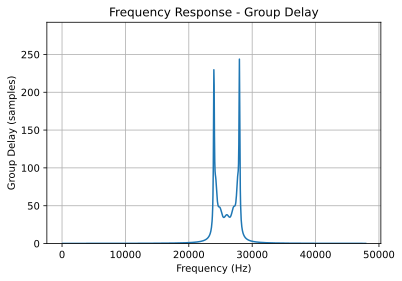

In [ ]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

Gambar diatas adalah grafik yang menunjukkan respons frekuensi untuk delay grup dari suatu sistem atau filter. Berikut adalah penjelasan rinci tentang grafik tersebut:

1. **Judul Grafik:**

- Judul di bagian atas grafik adalah "Frequency Response - Group Delay", yang menunjukkan bahwa grafik ini menggambarkan respons frekuensi dari penundaan grup.

2. **Sumbu X:**

- Sumbu X mewakili frekuensi dalam satuan Hertz (Hz), berkisar dari 0 Hz hingga 50,000 Hz.

3. **Sumbu Y:**

- Sumbu Y mewakili penundaan grup dalam satuan sampel (samples).

4. **Kurva:**

- Kurva pada grafik ini menunjukkan bagaimana penundaan grup bervariasi seiring dengan perubahan frekuensi.
Terlihat bahwa ada dua puncak utama sekitar frekuensi 25000 Hz di mana penundaan grup mencapai nilai maksimum lebih dari 250 sampel.

#**Jobsheet 6 IIR**

## **Pemilihan Filter**

Pemilihan jenis filter sering menjadi pertimbangan penting bagi pengembang perangkat digital. Pilihan antara filter FIR dan IIR dilakukan berdasarkan kriteria berikut:

- Karakteristik fase dari filter IIR bersifat non-linear. Filter FIR dapat memiliki karakteristik fase yang secara ketat linear. Ini berarti filter tersebut tidak menyebabkan distorsi pada bentuk sinyal.
- Filter FIR stabil karena diimplementasikan dalam bentuk non-rekursif. Filter IIR dapat menjadi tidak stabil.
- Dalam kasus nyata, pertanyaan tentang pemilihan resolusi data (pembulatan, kuantisasi) menjadi kurang signifikan dalam perangkat tanpa umpan balik, yaitu dalam filter FIR.
- Implementasi respons frekuensi dengan bentuk yang kompleks atau maksimal persegi membutuhkan jumlah koefisien filter FIR yang signifikan. Filter IIR lebih efisien dalam menangani tugas ini.
- Filter FIR umumnya tidak memiliki filter analog yang setara.
- Filter FIR memungkinkan untuk dengan mudah mendapatkan karakteristik yang diinginkan (level penurunan, ketidakmerataan di jalur lewat, frekuensi cut-off, dll.)
- Filter IIR jauh lebih efisien dalam hal jumlah operasi perkalian, penambahan, dan jumlah elemen penundaannya.



### Contoh

Misalkan ada filter yang dijelaskan oleh fungsi transfer berikut:

$$H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$$

Dimana :
- $N = 2$, $M = 2$
- $b_i = {0.1, -0.6, 0.5}$
- $a_i = {1, 0.7, -0.2}$


Jumlah persamaan diferensial untuk filter tertentu sama dengan jumlah penjumlah pada skema. Dengan mengetahui persamaan diferensial, kita dapat menemukan karakteristik impuls filter: sinyal impuls satu unit diterapkan ke input (kondisi awalnya nol).

Kita akan menemukan karakteristik impuls menggunakan Python. Dengan menggunakan fungsi `lfilter(b, a, x)`, proses melewati sinyal x melalui filter digital dipodelkan, dengan koefisien karakteristik transfer `a` dan `b`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

## **Filter Butterworth**

Contoh implementasi **filter Butterworth** orde 3. Kami akan menunjukkan bagaimana sinyal yang bising melewati filter tersebut:

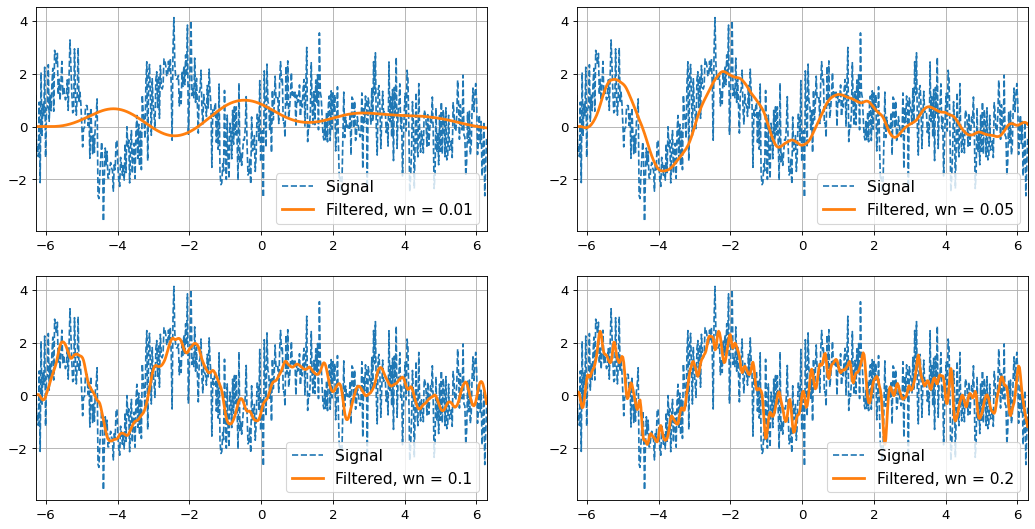

In [3]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Add some white noise
np.random.seed(1)
xn = x + np.random.randn(len(t))

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

wn = [0.01, 0.05, 0.1, 0.2]

# Calculate IIR filter
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot results
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')

Gambar diatas menunjukkan serangkaian plot yang membandingkan sinyal asli (dalam bentuk garis titik-titik biru) dengan hasil filter sinyal yang diterapkan menggunakan filter low-pass dengan berbagai nilai frekuensi cut-off (wn).

Berikut adalah penjelasan untuk masing-masing subplot:

**1. Subplot Kiri Atas (Filtered, wn = 0.01):**

- Garis oranye (Filtered) menunjukkan hasil dari filter low-pass dengan frekuensi cut-off (wn) sebesar 0.01.
- Filter ini sangat halus, mengambil nilai rata-rata dari sinyal asli dan menghilangkan banyak detail dan noise.

**2. Subplot Kanan Atas (Filtered, wn = 0.05):**

- Garis oranye (Filtered) menunjukkan hasil dari filter low-pass dengan frekuensi cut-off (wn) sebesar 0.05.
- Filter ini masih cukup halus tetapi mulai mempertahankan beberapa detail dari sinyal asli dibandingkan dengan filter pada subplot kiri atas.

**3. Subplot Kiri Bawah (Filtered, wn = 0.1):**

- Garis oranye (Filtered) menunjukkan hasil dari filter low-pass dengan frekuensi cut-off (wn) sebesar 0.1.
- Filter ini menjaga lebih banyak detail dari sinyal asli dibandingkan dengan filter di subplot kiri atas dan kanan atas, tetapi tetap menghilangkan sebagian besar noise.

**4. Subplot Kanan Bawah (Filtered, wn = 0.2):**

- Garis oranye (Filtered) menunjukkan hasil dari filter low-pass dengan frekuensi cut-off (wn) sebesar 0.2.
- Filter ini mempertahankan lebih banyak komponen frekuensi tinggi dibandingkan dengan subplot yang lain, sehingga hanya menghaluskan sinyal asli sedikit dan tetap mempertahankan banyak detail serta beberapa noise.

Secara keseluruhan, subplot ini menunjukkan efek dari berbagai frekuensi cut-off pada filter low-pass terhadap sinyal asli. Frekuensi cut-off yang lebih rendah menghasilkan sinyal yang lebih halus dengan lebih sedikit detail, sedangkan frekuensi cut-off yang lebih tinggi mempertahankan lebih banyak detail dalam sinyal.